In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
ChurnA = pd.read_csv('churn1.csv')
ChurnA.head()

# ChurnB = pd.read_excel("churn2.xlsx")
# ChurnB.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = ChurnA.copy()
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

for col in ['Gender', 'Geography']:
    df[col] = df[col].astype('category')
    
df["Gender"] = df["Gender"].cat.codes
df["Geography"] = df["Geography"].cat.codes

df.dtypes

CreditScore          int64
Geography             int8
Gender                int8
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [39]:
df.isnull().values.any()

False

In [4]:
y = df["Churn"].values
X = df.drop(labels = ["Churn"],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
y = df["Churn"].values
X = df['CreditScore'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics

### Logistic Regression
Logistic Regression is one of the most used machine learning algorithm and mainly used when the dependent variable (here churn 1 or churn 0) is categorical. 

In [21]:
model = LogisticRegression()
model.fit(X_train.reshape(-1,1), y_train)

/home/xunwei/anaconda3/envs/fyp/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of Logistic Regressionr on test set: {:.2f}'.format(model.score(X_test[X_train.columns], y_test)))

Accuracy of Logistic Regression on training set: 0.79
Accuracy of Logistic Regressionr on test set: 0.78


In [ ]:
value = np.vstack(np.linspace(1,599,599,dtype=np.int16))

In [32]:
model.predict_proba(value)[:,1].mean()

0.35140647073986436

In [57]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

Age                0.041241
Geography          0.000284
Balance            0.000004
EstimatedSalary   -0.000001
HasCrCard         -0.000146
NumOfProducts     -0.000548
Gender            -0.001204
IsActiveMember    -0.001661
Tenure            -0.002187
CreditScore       -0.004948
dtype: float64

### K Nearest Neighbours
Similar attributes might lead to similar churn. Is that person closer in characteristics to people who churned or did not churn?

In [83]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

In [84]:
print('Accuracy of KNN on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.2f}'.format(model.score(X_test[X_train.columns], y_test)))

Accuracy of KNN on training set: 0.82
Accuracy of KNN on test set: 0.76


In [33]:
model.predict_proba(value)[:,1].mean()

0.35140647073986436

### XGBoost

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

In [69]:
#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.88
Accuracy of XGB classifier on test set: 0.87


In [73]:
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.79      0.52      0.63       423

    accuracy                           0.87      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [34]:
model.predict_proba(value)[:,1].mean()

0.35140647073986436

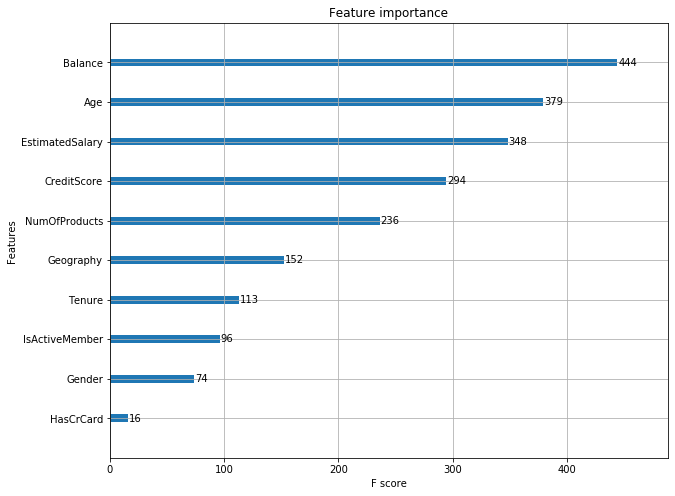

In [74]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

## Analysis

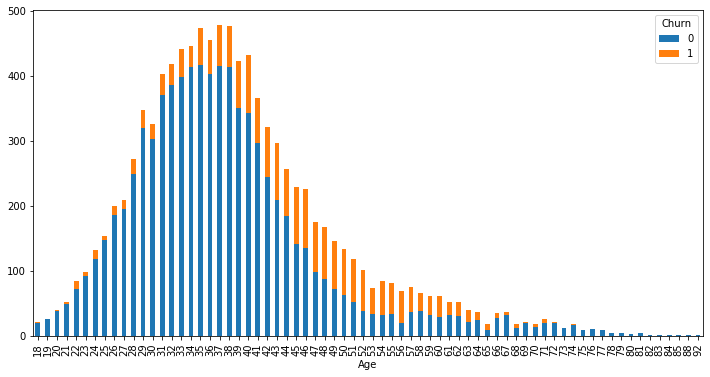

In [78]:
df.groupby(["Age", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6)) 

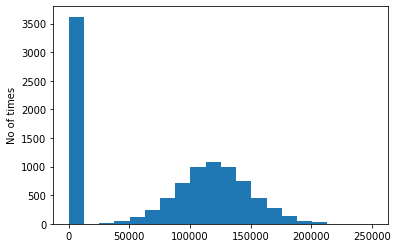

In [95]:
plt.hist([df.Balance], bins=20)
plt.ylabel('No of times')
plt.show()

In [61]:
df.groupby('Age').Churn.count().sort_values(ascending=False)

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
83      1
82      1
85      1
88      1
Name: Churn, Length: 70, dtype: int64